In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
image_size=256
batch_size=32

In [ ]:
df=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/tea_disease',shuffle=True,
                                                   image_size = (image_size,image_size),
                                                   batch_size=batch_size)

Found 885 files belonging to 8 classes.


In [ ]:
dF_class=df.class_names

In [ ]:
dF_class

['Anthracnose',
 'algal_leaf',
 'bird_eye_spot',
 'brown_blight',
 'gray_light',
 'healthy',
 'red_leaf_spot',
 'white_spot']

In [ ]:
len(df)

28

In [ ]:
28*32 

896

In [ ]:
for image_batch,label_batch in df.take(1):
    print(image_batch[0].numpy)
    print(label_batch[0])

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[209. , 201. , 207. ],
        [211. , 200.5, 208.5],
        [211.5, 200.5, 208.5],
        ...,
        [234.5, 224.5, 229. ],
        [236. , 225. , 229. ],
        [236. , 224.5, 228.5]],

       [[210. , 198. , 206.5],
        [211. , 199.5, 208.5],
        [211.5, 199.5, 209.5],
        ...,
        [233. , 225.5, 230. ],
        [234. , 226.5, 230. ],
        [233. , 225.5, 228. ]],

       [[212. , 199. , 208.5],
        [212.5, 200.5, 210.5],
        [212. , 200. , 210. ],
        ...,
        [232. , 225.5, 231. ],
        [232. , 226. , 230. ],
        [231.5, 226. , 230. ]],

       ...,

       [[185.5, 176.5, 174. ],
        [186. , 174. , 178. ],
        [188. , 176. , 180. ],
        ...,
        [184. , 170. , 167. ],
        [187. , 172. , 167. ],
        [188.5, 170.5, 164. ]],

       [[186.5, 175.5, 173.5],
        [187. , 175. , 179. ],
        [185. , 173. , 177

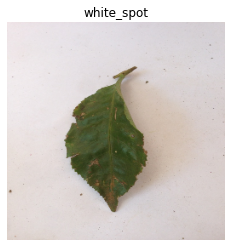

In [ ]:
for image_batch,label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(dF_class[label_batch[0]])
    plt.axis("off")

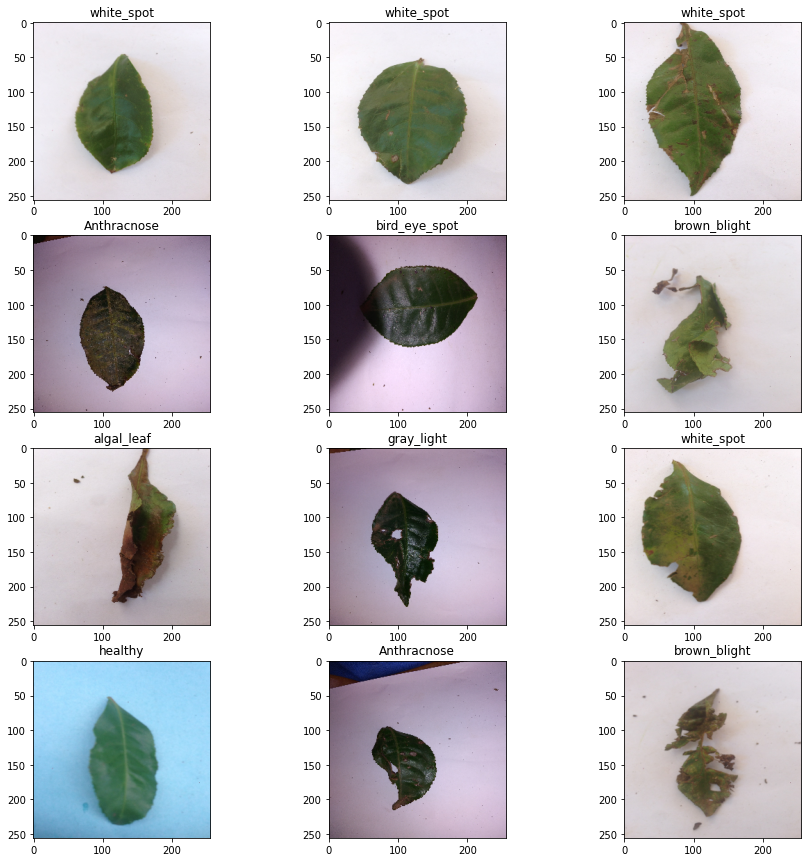

In [ ]:
#if i have to see multiple image with classs  
#no of image is 12
plt.figure(figsize=(15,15))
for image_batch,label_batch in df.take(1):
    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(dF_class[label_batch[i]])

In [ ]:
def get_dateset_train_test(df,train_size=0.8,test_size=0.1,validation_size=0.1,shuffle=True,shuffle_size=1000):
    
    if shuffle:
        df=df.shuffle(shuffle_size,seed=12)
    
    df_size=len(df)
    tr_size=int(df_size*train_size)
    train_df=df.take(tr_size)
    
    val_s=int(df_size*validation_size)
    val_df=df.skip(tr_size).take(val_s)
    
    test_df=df.skip(tr_size).skip(val_s)
    
    
    
    
    return train_df,test_df,val_df

In [ ]:
train_df,test_df,val_df=get_dateset_train_test(df)

In [ ]:
len(train_df)

22

In [ ]:
len(test_df)

4

In [ ]:
len(val_df)

2

In [ ]:
train_df=train_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_df=val_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_df=test_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(batch_size,image_size,image_size,3)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(8,activation='softmax')
])

In [ ]:
model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 60, 60, 64)         

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_df,
    epochs=50,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_df
)

Epoch 1/50
22/22 [==============================] - 4s 69ms/step - loss: 2.0510 - accuracy: 0.1558 - val_loss: 2.0484 - val_accuracy: 0.1562
Epoch 2/50
22/22 [==============================] - 1s 60ms/step - loss: 1.8741 - accuracy: 0.2424 - val_loss: 1.5655 - val_accuracy: 0.3125
Epoch 3/50
22/22 [==============================] - 1s 59ms/step - loss: 1.3816 - accuracy: 0.4113 - val_loss: 1.2128 - val_accuracy: 0.4219
Epoch 4/50
22/22 [==============================] - 1s 62ms/step - loss: 1.2282 - accuracy: 0.4531 - val_loss: 1.1619 - val_accuracy: 0.4219
Epoch 5/50
22/22 [==============================] - 1s 62ms/step - loss: 1.1208 - accuracy: 0.4877 - val_loss: 1.0344 - val_accuracy: 0.5156
Epoch 6/50
22/22 [==============================] - 1s 62ms/step - loss: 1.0673 - accuracy: 0.5065 - val_loss: 1.0321 - val_accuracy: 0.5625
Epoch 7/50
22/22 [==============================] - 1s 60ms/step - loss: 1.0063 - accuracy: 0.5642 - val_loss: 1.1858 - val_accuracy: 0.5312
Epoch 8/50
22

In [ ]:
model.history

In [ ]:
score=model.evaluate(test_df)

4/4 [==============================] - 0s 30ms/step - loss: 0.3346 - accuracy: 0.9453


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.15584415197372437,
 0.24242424964904785,
 0.411255419254303,
 0.4531024396419525,
 0.48773449659347534,
 0.5064935088157654,
 0.5642135739326477,
 0.5382395386695862,
 0.5685425400733948,
 0.6075035929679871,
 0.6334776282310486,
 0.6608946323394775,
 0.7171717286109924,
 0.7417027354240417,
 0.7748917937278748,
 0.7936508059501648,
 0.8138527870178223,
 0.7965368032455444,
 0.8282828330993652,
 0.8556998372077942,
 0.860028862953186,
 0.8109667897224426,
 0.8672438859939575,
 0.9292929172515869,
 0.9249639511108398,
 0.9509379267692566,
 0.948051929473877,
 0.9509379267692566,
 0.9408369660377502,
 0.9653679728507996,
 0.9307359457015991,
 0.972582995891571,
 0.9783549904823303,
 0.9956709742546082,
 0.9913420081138611,
 0.9985569715499878,
 0.9163058996200562,
 0.9408369660377502,
 0.9624819755554199,
 0.966810941696167,
 0.9855700135231018,
 0.9898989796638489,
 1.0,
 0.9956709742546082,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'training and validation accuracy')

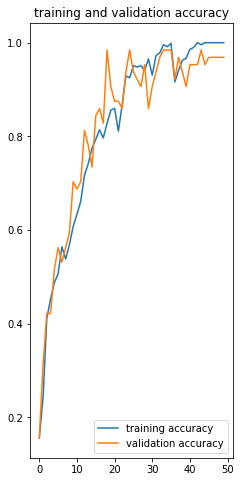

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='training accuracy')
plt.plot(range(50),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

In [ ]:
import numpy as np

first images to predict
actual label :  bird_eye_spot
1/1 [==============================] - 0s 118ms/step
predicted label bird_eye_spot


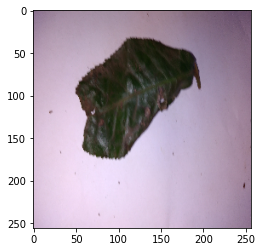

In [ ]:
for image_batch, labels_batch in test_df.take(1):
    first_image= image_batch[0].numpy().astype('uint8')
    first_label= labels_batch[0].numpy()
    
    print("first images to predict")
    plt.imshow(first_image)
    print('actual label : ',dF_class[first_label])
    
    batch_prediction=model.predict(image_batch)
    print('predicted label',dF_class[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array,0) #creating the batch
    
    prediction = model.predict(img_array)
    
    pre_class= dF_class[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return pre_class , confidence

1/1 [==============================] - 0s 28ms/step


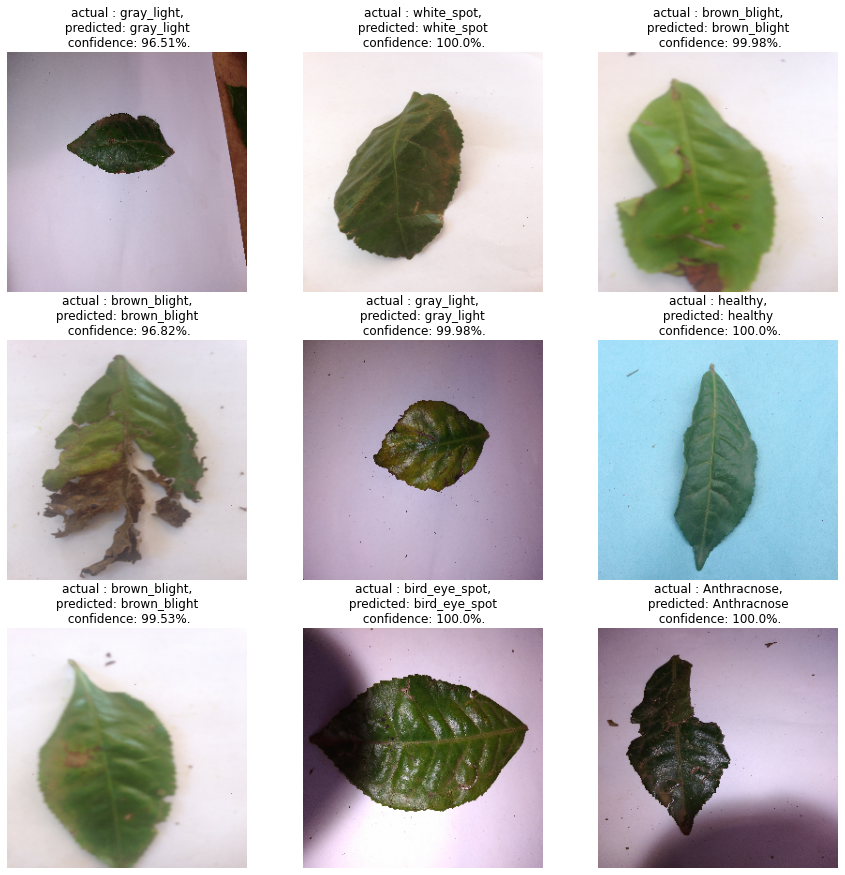

In [ ]:
plt.figure(figsize=(15,15))
for image , label in test_df.take(1):
    for i in range(9):
        ax =plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        
        prediction_class , confidence= predict(model,image[i].numpy())
        actual_class=dF_class[label[i]]
        plt.title(f"actual : {actual_class},\n predicted: {prediction_class} \n confidence: {confidence}%.")
        plt.axis('off')

In [ ]:
pre = predict(model,test_df)

1/1 [==============================] - 0s 41ms/step


In [ ]:
pre

('Anthracnose', 100.0)

In [ ]:
y_pred = model.predict(df)

28/28 [==============================] - 24s 613ms/step


In [ ]:
y_pred


array([[1.5935390e-15, 7.2814005e-10, 5.4878407e-12, ..., 6.2034948e-19,
        9.9988520e-01, 7.0754140e-05],
       [9.9999619e-01, 3.4448372e-24, 3.7613515e-06, ..., 1.0416092e-09,
        9.9550109e-16, 1.1960392e-24],
       [1.0348961e-09, 1.0478561e-28, 1.0000000e+00, ..., 2.5709518e-20,
        8.2638910e-17, 1.2748626e-33],
       ...,
       [4.1281211e-14, 1.0000000e+00, 9.4961363e-15, ..., 1.4239845e-14,
        6.6094717e-12, 2.1270077e-09],
       [2.6804486e-07, 8.8788510e-28, 9.9999344e-01, ..., 6.7976556e-22,
        4.5047601e-17, 3.5175503e-36],
       [1.0587646e-29, 3.8836547e-31, 1.7083497e-27, ..., 1.7134125e-29,
        1.0000000e+00, 1.5606967e-13]], dtype=float32)

In [ ]:
# confusion_matrix

from sklearn.metrics import confusion_matrix

In [ ]:
def predict1(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array,0) #creating the batch
    
    prediction = model.predict(img_array)
    
    pre_class= dF_class[np.argmax(prediction[0])]
#     confidence = round(100*(np.max(prediction[0])),2)
    return pre_class

In [ ]:
for image,label in df.take(28):
    for i in range(32):
        pred_class = predict1(model,image[i].numpy())
        actual_class = dF_class[label[i]]
        print(actual_class)
        print(pred_class)

1/1 [==============================] - 0s 30ms/step
bird_eye_spot
bird_eye_spot
1/1 [==============================] - 0s 65ms/step
gray_light
gray_light
1/1 [==============================] - 0s 39ms/step
Anthracnose
Anthracnose
1/1 [==============================] - 0s 60ms/step
red_leaf_spot
red_leaf_spot
1/1 [==============================] - 0s 48ms/step
algal_leaf
algal_leaf
1/1 [==============================] - 0s 36ms/step
bird_eye_spot
bird_eye_spot
1/1 [==============================] - 0s 29ms/step
gray_light
Anthracnose
1/1 [==============================] - 0s 49ms/step
red_leaf_spot
red_leaf_spot
1/1 [==============================] - 0s 34ms/step
gray_light
gray_light
1/1 [==============================] - 0s 41ms/step
bird_eye_spot
bird_eye_spot
1/1 [==============================] - 0s 27ms/step
Anthracnose
Anthracnose
1/1 [==============================] - 0s 27ms/step
brown_blight
brown_blight
1/1 [==============================] - 0s 51ms/step
Anthracnose
Anthracno

InvalidArgumentError: ignored

In [ ]:
actual=[]
pre=[]
for image,label in df.take(28):
    for i in range(32):
        pred_class = predict1(model,image[i].numpy())
        actual_class = dF_class[label[i]]
        actual.append(actual_class)
        pre.append(pred_class)

1/1 [==============================] - 0s 26ms/step


InvalidArgumentError: ignored

In [ ]:
actual

['white_spot',
 'white_spot',
 'algal_leaf',
 'algal_leaf',
 'algal_leaf',
 'bird_eye_spot',
 'red_leaf_spot',
 'gray_light',
 'gray_light',
 'brown_blight',
 'algal_leaf',
 'Anthracnose',
 'gray_light',
 'algal_leaf',
 'algal_leaf',
 'algal_leaf',
 'algal_leaf',
 'red_leaf_spot',
 'bird_eye_spot',
 'Anthracnose',
 'algal_leaf',
 'red_leaf_spot',
 'gray_light',
 'gray_light',
 'white_spot',
 'algal_leaf',
 'Anthracnose',
 'gray_light',
 'Anthracnose',
 'healthy',
 'red_leaf_spot',
 'red_leaf_spot',
 'red_leaf_spot',
 'gray_light',
 'Anthracnose',
 'white_spot',
 'white_spot',
 'gray_light',
 'healthy',
 'Anthracnose',
 'healthy',
 'brown_blight',
 'gray_light',
 'red_leaf_spot',
 'bird_eye_spot',
 'brown_blight',
 'healthy',
 'brown_blight',
 'Anthracnose',
 'white_spot',
 'red_leaf_spot',
 'algal_leaf',
 'healthy',
 'Anthracnose',
 'white_spot',
 'healthy',
 'Anthracnose',
 'gray_light',
 'healthy',
 'white_spot',
 'Anthracnose',
 'Anthracnose',
 'gray_light',
 'bird_eye_spot',
 'whit

In [ ]:
pre

['white_spot',
 'white_spot',
 'algal_leaf',
 'algal_leaf',
 'algal_leaf',
 'bird_eye_spot',
 'red_leaf_spot',
 'gray_light',
 'gray_light',
 'brown_blight',
 'algal_leaf',
 'bird_eye_spot',
 'gray_light',
 'algal_leaf',
 'algal_leaf',
 'algal_leaf',
 'algal_leaf',
 'red_leaf_spot',
 'bird_eye_spot',
 'Anthracnose',
 'algal_leaf',
 'red_leaf_spot',
 'gray_light',
 'gray_light',
 'white_spot',
 'algal_leaf',
 'Anthracnose',
 'gray_light',
 'Anthracnose',
 'healthy',
 'red_leaf_spot',
 'red_leaf_spot',
 'red_leaf_spot',
 'gray_light',
 'Anthracnose',
 'white_spot',
 'white_spot',
 'gray_light',
 'healthy',
 'Anthracnose',
 'healthy',
 'brown_blight',
 'gray_light',
 'red_leaf_spot',
 'bird_eye_spot',
 'brown_blight',
 'healthy',
 'brown_blight',
 'Anthracnose',
 'white_spot',
 'red_leaf_spot',
 'algal_leaf',
 'healthy',
 'gray_light',
 'white_spot',
 'healthy',
 'Anthracnose',
 'gray_light',
 'healthy',
 'white_spot',
 'Anthracnose',
 'Anthracnose',
 'gray_light',
 'bird_eye_spot',
 'whi

In [ ]:
plt.figure(figsize=(15,15))
cm = confusion_matrix(actual,pre)
print(cm)

[[ 90   0   5   0   4   1   0   0]
 [  0 111   0   1   0   0   0   1]
 [  4   0  93   0   3   0   0   0]
 [  0   2   0 105   0   0   2   4]
 [  6   0   2   0  92   0   0   0]
 [  0   0   0   0   0  74   0   0]
 [  0   1   3   0   0   0 135   4]
 [  0   0   0   2   0   0   1 139]]


<Figure size 1080x1080 with 0 Axes>

<Axes: >

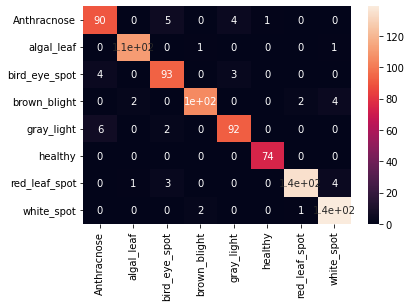

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,xticklabels=dF_class,yticklabels=dF_class)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(actual,pre))

               precision    recall  f1-score   support

  Anthracnose       0.90      0.90      0.90       100
   algal_leaf       0.97      0.98      0.98       113
bird_eye_spot       0.90      0.93      0.92       100
 brown_blight       0.97      0.93      0.95       113
   gray_light       0.93      0.92      0.92       100
      healthy       0.99      1.00      0.99        74
red_leaf_spot       0.98      0.94      0.96       143
   white_spot       0.94      0.98      0.96       142

     accuracy                           0.95       885
    macro avg       0.95      0.95      0.95       885
 weighted avg       0.95      0.95      0.95       885



In [ ]:
model_version =1
model.save(f'C:\code\tea_leaf_disease{model_version}')